In [106]:
import pandas as pd
import numpy as np

In [107]:
customer_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="客戶資料檔")
print(customer_data.head())
card_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡資料檔")
trade_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡交易記錄檔")
trade_data=pd.DataFrame(trade_data)

   客戶ID  年齡         生日    居住地 教育程度   性別 婚姻狀況    職業 辦第一張信用卡的時間
0    89  59 1953-09-21  大台北地區   學士  1:男   已婚  白領主管 2003-11-27
1   106  63 1949-10-27  大台北地區   專科  1:男   已婚  白領主管 2003-11-10
2   131  69 1943-11-13  大台北地區   學士  1:男   已婚    其他 2002-11-07
3   179  64 1948-08-02  大台北地區   學士  1:男   已婚  白領主管 2002-09-23
4   261  56 1956-12-01  大台北地區   專科  1:男   已婚   自由業 2003-10-13


In [166]:
customer=list()
last_buy=list()
fre=list()
monetary=list()
purchase_time=list()
for i in range(len(trade_data)):
    if i==0 or trade_data["客戶ID"][i]!=trade_data["客戶ID"][i-1]:
        customer.append(trade_data["客戶ID"][i])
        last_buy.append(trade_data["刷卡日期"][i])
        time=0
        last=trade_data["刷卡日期"][i]
        money=trade_data["刷卡金額"][i]
    #print(i)
    if i!=0:
        if ((trade_data["客戶ID"][i]==trade_data["客戶ID"][i-1])):
                time=time+1
                money=money+trade_data["刷卡金額"][i]
        try:
            if trade_data["客戶ID"][i]!=trade_data["客戶ID"][i+1]:
                before=trade_data["刷卡日期"][i]
                #print(before)
                #print(last)
                #print(trade_data["客戶ID"][i])
                print("last",last)
                print("before",before)
                delta=int(str(last-before).split(" ")[0])
                print(trade_data["客戶ID"][i])
                print(delta)
                print("time",time)
                time=time+1
                if delta==0:
                    fre.append(0)
                else:
                    fre.append(time/(delta))
                money=money/time
                monetary.append(money)
                purchase_time.append(time)
        except:
            before=trade_data["刷卡日期"][i]
            delta=int(str(last-before).split(" ")[0])
            time=time+1
            
            if delta==0:
                fre.append(0)
                purchase_time.append(time)
            else:
                fre.append(time/(delta))
                purchase_time.append(time)
            money=money/time
            monetary.append(money)
print(fre)
print(len(customer))
print(len(last_buy))
print(len(fre))
print(len(monetary))
print(len(purchase_time))

last 2012-11-12 00:00:00
before 2010-12-14 00:00:00
89
699
time 84
last 2012-11-23 00:00:00
before 2010-12-10 00:00:00
106
714
time 74
last 2011-10-27 00:00:00
before 2010-12-02 00:00:00
131
329
time 15
last 2012-02-15 00:00:00
before 2010-12-01 00:00:00
179
441
time 3
last 2011-12-13 00:00:00
before 2010-12-21 00:00:00
261
357
time 12
last 2012-11-28 00:00:00
before 2010-12-01 00:00:00
605
728
time 954
last 2012-11-21 00:00:00
before 2010-12-20 00:00:00
773
702
time 25
last 2012-10-15 00:00:00
before 2010-12-13 00:00:00
861
672
time 88
last 2012-11-19 00:00:00
before 2011-02-25 00:00:00
867
633
time 14
last 2012-11-13 00:00:00
before 2010-12-10 00:00:00
920
704
time 118
last 2012-10-22 00:00:00
before 2010-12-31 00:00:00
1250
661
time 23
last 2012-11-26 00:00:00
before 2011-01-10 00:00:00
1314
686
time 38
last 2012-05-07 00:00:00
before 2011-06-21 00:00:00
1467
321
time 4
last 2012-11-30 00:00:00
before 2012-07-27 00:00:00
1611
126
time 2
last 2012-11-22 00:00:00
before 2010-12-10 00:

In [167]:
CRM=pd.DataFrame(customer_data)
#CRM["customer ID"]=customer
CRM["last buy"]=last_buy
CRM["frequency"]=fre
CRM["monetary"]=monetary
CRM["purchase time"]=purchase_time
print(CRM)

     客戶ID  年齡         生日    居住地   教育程度   性別 婚姻狀況                職業 辦第一張信用卡的時間  \
0      89  59 1953-09-21  大台北地區     學士  1:男   已婚              白領主管 2003-11-27   
1     106  63 1949-10-27  大台北地區     專科  1:男   已婚              白領主管 2003-11-10   
2     131  69 1943-11-13  大台北地區     學士  1:男   已婚                其他 2002-11-07   
3     179  64 1948-08-02  大台北地區     學士  1:男   已婚              白領主管 2002-09-23   
4     261  56 1956-12-01  大台北地區     專科  1:男   已婚               自由業 2003-10-13   
5     605  46 1966-06-04  大台北地區     高中  1:男   已婚  藍領(勞動工作或作業員)一般職員 2003-02-07   
6     773  45 1967-11-23  大台北地區     學士  1:男   已婚            白領一般職員 2003-11-21   
7     861  41 1971-01-22  大台北地區     學士  1:男   已婚              白領主管 2002-12-03   
8     867  47 1965-10-28  大台北地區     高中  1:男   已婚              白領主管 2002-10-11   
9     920  39 1973-05-29  大台北地區     學士  1:男   已婚            自營事業老闆 2010-03-05   
10   1250  50 1962-10-18  大台北地區     高中  1:男   已婚              白領主管 2002-08-23   
11   1314  45 1967-07-11  大台

In [168]:
def give_score(data,total):
    score=list()
    for i in range(total):
        #print(i)
        #print(i,data[i])
        if data[i]>=0.8*total:
            score.append("5")
        elif data[i]>=0.6*total:
            score.append("4")
        elif data[i]>=0.4*total:
            score.append("3")
        elif data[i]>=0.2*total:
            score.append("2")
        else:
            score.append("1")
    print(score)
    return score
    

CRM["fre_rank"]=CRM["frequency"].rank()
CRM["frequency point"]=give_score(CRM["fre_rank"],len(CRM["fre_rank"]))
CRM["monetary_rank"]=CRM["monetary"].rank()
CRM["monetary point"]=give_score(CRM["monetary_rank"],len(CRM["monetary_rank"]))
CRM["last buy_rank"]=CRM["last buy"].rank()
CRM["last buy point"]=give_score(CRM["last buy_rank"],len(CRM["last buy_rank"]))
score=list()
for i in range(len(CRM)):
    score.append(int(CRM["frequency point"][i])+int(CRM["last buy point"][i])+int(CRM["monetary point"][i]))
CRM["CRM score"]=score 

['4', '3', '2', '1', '2', '5', '2', '4', '1', '4', '2', '3', '1', '1', '3', '2', '4', '5', '3', '5', '4', '5', '5', '1', '1', '3', '2', '5', '1', '4', '5', '3', '4', '2', '2', '2', '5', '3', '3', '3', '4', '5', '5', '1', '5', '4', '1', '1', '4', '1', '2', '1', '3', '1', '4', '2', '1', '3', '5', '4', '2', '3', '5', '5', '4', '2', '4', '2', '1', '3', '2', '3', '3', '5', '1', '3', '3', '5', '3', '1', '5', '5', '2', '3', '1', '4', '4', '2', '2', '4', '5', '2', '5', '2', '3', '1', '4', '4', '5', '4']
['3', '2', '5', '4', '3', '1', '3', '5', '4', '4', '5', '5', '2', '1', '2', '3', '2', '1', '4', '1', '3', '1', '4', '4', '2', '4', '1', '3', '1', '2', '1', '5', '3', '2', '2', '2', '5', '5', '1', '4', '1', '5', '5', '1', '3', '4', '3', '1', '2', '5', '2', '5', '5', '3', '1', '3', '5', '4', '2', '1', '1', '4', '1', '5', '2', '4', '3', '4', '3', '4', '5', '2', '2', '4', '5', '3', '4', '2', '5', '3', '4', '2', '1', '2', '4', '5', '3', '5', '5', '1', '3', '4', '2', '5', '1', '4', '3', '2', '3', '3'

In [169]:
CRM["CRM rank"]=CRM["CRM score"].rank(ascending=False, method='max')
print(CRM)

     客戶ID  年齡         生日    居住地   教育程度   性別 婚姻狀況                職業 辦第一張信用卡的時間  \
0      89  59 1953-09-21  大台北地區     學士  1:男   已婚              白領主管 2003-11-27   
1     106  63 1949-10-27  大台北地區     專科  1:男   已婚              白領主管 2003-11-10   
2     131  69 1943-11-13  大台北地區     學士  1:男   已婚                其他 2002-11-07   
3     179  64 1948-08-02  大台北地區     學士  1:男   已婚              白領主管 2002-09-23   
4     261  56 1956-12-01  大台北地區     專科  1:男   已婚               自由業 2003-10-13   
5     605  46 1966-06-04  大台北地區     高中  1:男   已婚  藍領(勞動工作或作業員)一般職員 2003-02-07   
6     773  45 1967-11-23  大台北地區     學士  1:男   已婚            白領一般職員 2003-11-21   
7     861  41 1971-01-22  大台北地區     學士  1:男   已婚              白領主管 2002-12-03   
8     867  47 1965-10-28  大台北地區     高中  1:男   已婚              白領主管 2002-10-11   
9     920  39 1973-05-29  大台北地區     學士  1:男   已婚            自營事業老闆 2010-03-05   
10   1250  50 1962-10-18  大台北地區     高中  1:男   已婚              白領主管 2002-08-23   
11   1314  45 1967-07-11  大台

In [172]:
#2012/12/31
from datetime import datetime
text="2012-12-31"
quarter=92
score=list()
def get_recency_point(data):
    for i in range(len(data)):
        new_date=str(data[i]).split(" ")[0]
        #print(new_date)
        #date = datetime.strftime(data[i],'%Y-%m-%d')
        #print(type(datetime.date(data[i])))
        #print(type(ending_day))
        new_date=datetime.strptime(new_date, '%Y-%m-%d')
        ending_day=datetime.strptime(text,"%Y-%m-%d")
        day=ending_day-new_date
        #print(day)
        day=int(str(day).split(" ")[0])
        #print(day)
        if day >=4*quarter:
            score.append(3)
        elif day>=3*quarter:
            score.append(6)
        elif day>=2*quarter:
            score.append(12)
        else :
            score.append(24)
    return score

def get_frequency_point(data):
    score=list()
    for i in range(len(data)):
        score.append(data[i]*4)
    return score

def get_monetary_point(data):
    score=list()
    for i in range(len(data)):
        grade=0
        grade=data[i]/10
        if grade>9:
            grade=9
        score.append(grade)
    return score
CRM["BRP"]=get_recency_point(CRM["last buy"])
CRM["BFP"]=get_frequency_point(CRM["purchase time"])
CRM["BMF"]=get_monetary_point(CRM["monetary"])
BTS=list()
for i in range(len(CRM)):
    BTS.append(int(CRM["BRP"][i])+int(CRM["BFP"][i])+int(CRM["BMF"][i]))
CRM["BTS"]=BTS
CRM["BTS rank"]=CRM["BTS"].rank(ascending=False, method='max')
print(CRM)

     客戶ID  年齡         生日    居住地   教育程度   性別 婚姻狀況                職業 辦第一張信用卡的時間  \
0      89  59 1953-09-21  大台北地區     學士  1:男   已婚              白領主管 2003-11-27   
1     106  63 1949-10-27  大台北地區     專科  1:男   已婚              白領主管 2003-11-10   
2     131  69 1943-11-13  大台北地區     學士  1:男   已婚                其他 2002-11-07   
3     179  64 1948-08-02  大台北地區     學士  1:男   已婚              白領主管 2002-09-23   
4     261  56 1956-12-01  大台北地區     專科  1:男   已婚               自由業 2003-10-13   
5     605  46 1966-06-04  大台北地區     高中  1:男   已婚  藍領(勞動工作或作業員)一般職員 2003-02-07   
6     773  45 1967-11-23  大台北地區     學士  1:男   已婚            白領一般職員 2003-11-21   
7     861  41 1971-01-22  大台北地區     學士  1:男   已婚              白領主管 2002-12-03   
8     867  47 1965-10-28  大台北地區     高中  1:男   已婚              白領主管 2002-10-11   
9     920  39 1973-05-29  大台北地區     學士  1:男   已婚            自營事業老闆 2010-03-05   
10   1250  50 1962-10-18  大台北地區     高中  1:男   已婚              白領主管 2002-08-23   
11   1314  45 1967-07-11  大台

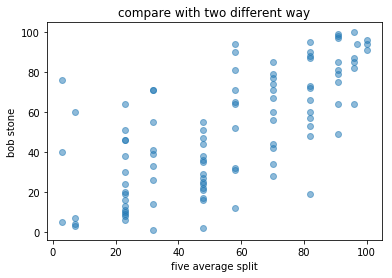

In [171]:
import matplotlib.pyplot as plt
plt.scatter(CRM["CRM rank"], CRM["BTS rank"], alpha=.5)
plt.title("compare with two different way")
plt.xlabel("five average split")
plt.ylabel("bob stone")
plt.show()

In [165]:
CRM.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CRM.xlsx")